In [1]:
#imports

# required libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob
import os
import warnings

# civ class
from civ_class import Civilization

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# List of pop types w/ stats
# all stats from 0-10
'''Running list of classes:
    - King
    - Noble
    - Knight
    - Mage
    - Peasant
    - Black Swordsman (Cheat)
'''

probability_color_dict = {"king":[0.01-1e-10,"gold"],
                          "noble":[0.04,"blue"],
                          "knight":[0.2,"gray"],
                          "mage":[0.1,"purple"],
                          "peasant":[0.65,"brown"],
                          "black_swordsman":[1e-10,"black"]}

max_class_dict = {"king":1,
                  "noble":100,
                  "knight":np.inf,
                  "mage":np.inf,
                  "peasant":np.inf,
                  "black_swordsman":1}

king_stat_dict = {"class":"king",
                  "probability":probability_color_dict["king"][0],
                  "special":False,
                  "color":probability_color_dict["king"][1],
                  "health":5,
                  "physical_strength":2,
                  "magic_strength":1,
                  "popularity":10,
                  "lifespan":100}

noble_stat_dict = {"class":"noble",
                   "probability":probability_color_dict["noble"][0],
                   "special":False,
                   "color":probability_color_dict["noble"][1],
                   "health":5,
                   "physical_strength":1,
                   "magic_strength":1,
                   "popularity":8,
                   "lifespan":100}

knight_stat_dict = {"class":"knight",
                    "probability":probability_color_dict["knight"][0],
                    "special":False,
                    "color":probability_color_dict["knight"][1],
                    "health":10,
                    "physical_strength":8,
                    "magic_strength":0,
                    "popularity":5,
                    "lifespan":80}

mage_stat_dict = {"class":"mage",
                  "probability":probability_color_dict["mage"][0],
                  "special":False,
                  "color":probability_color_dict["mage"][1],
                  "health":3,
                  "physical_strength":0,
                  "magic_strength":8,
                  "popularity":4,
                  "lifespan":120}

peasant_stat_dict = {"class":"peasant",
                     "probability":probability_color_dict["peasant"][0],
                     "special":False,
                     "color":probability_color_dict["peasant"][1],
                     "health":4,
                     "physical_strength":2,
                     "magic_strength":0,
                     "popularity":2,
                     "lifespan":50}

blackswordsman_stat_dict = {"class":"black_swordsman",
                            "probability":probability_color_dict["black_swordsman"][0],
                            "special":True,
                            "color":probability_color_dict["black_swordsman"][1],
                            "health":20,
                            "physical_strength":20,
                            "magic_strength":20,
                            "popularity":20,
                            "lifespan":np.inf}

In [3]:
# cities to build in sim
capital_dict = {"name":"capital",
                "size":20,
                "pop":100,
                "city_center":[50,50],
                "center_size":5}

first_town_dict = {"name":"first_town",
                   "size":7,
                   "pop":20,
                   "city_center":[20,20]}

second_town_dict = {"name":"second_town",
                    "size":7,
                    "pop":20,
                    "city_center":[20,80]}

third_town_dict = {"name":"third_town",
                   "size":7,
                   "pop":20,
                   "city_center":[80,20]}

fourth_town_dict = {"name":"fourth_town",
                    "size":7,
                    "pop":20,
                    "city_center":[80, 80]}

In [4]:
####################################################
# Random seeds for certain outcomes

# death seed
#np.random.seed(111111111)

# overpop seed
#np.random.seed(222387634)
####################################################

# class variables
run_time = 30
max_world_pop = 0.3
max_city_pop = 0.8
grid = [100,100]

# nested dict containing dictionaries of pop classes
class_dict = {king_stat_dict["class"]:king_stat_dict,
              noble_stat_dict["class"]:noble_stat_dict,
              knight_stat_dict["class"]:knight_stat_dict,
              mage_stat_dict["class"]:mage_stat_dict,
              peasant_stat_dict["class"]:peasant_stat_dict,
              blackswordsman_stat_dict["class"]:blackswordsman_stat_dict}

# nested dict containing dictionaries of cities
cities_dict = {capital_dict["name"]:capital_dict,
               first_town_dict["name"]:first_town_dict,
               second_town_dict["name"]:second_town_dict,
               third_town_dict["name"]:third_town_dict,
               fourth_town_dict["name"]:fourth_town_dict}

# run civ
TestCiv = Civilization(run_t = run_time, world_max_pop = max_world_pop, cities_max_pop = max_city_pop, grid_size = grid, world_class_dict = class_dict, world_cities_dict = cities_dict, world_max_class_dict = max_class_dict)
TestCiv.run_civilization()

# create an empty list called images
images = []

# get all the images in the 'images for gif' folder
for filename in sorted(glob.glob("civ_ims/*.png")): # loop through all png files in the folder
    im = Image.open(filename) # open the image
    images.append(im) # add the image to the list

# calculate the frame number of the last frame (ie the number of images)
last_frame = (len(images))

# save as a gif
images[0].save("civ_animation.gif", save_all=True, append_images=images[1:], optimize=False, duration=250, loop=0)

for filename in sorted(glob.glob("civ_ims/*.png")):
    os.remove(filename)

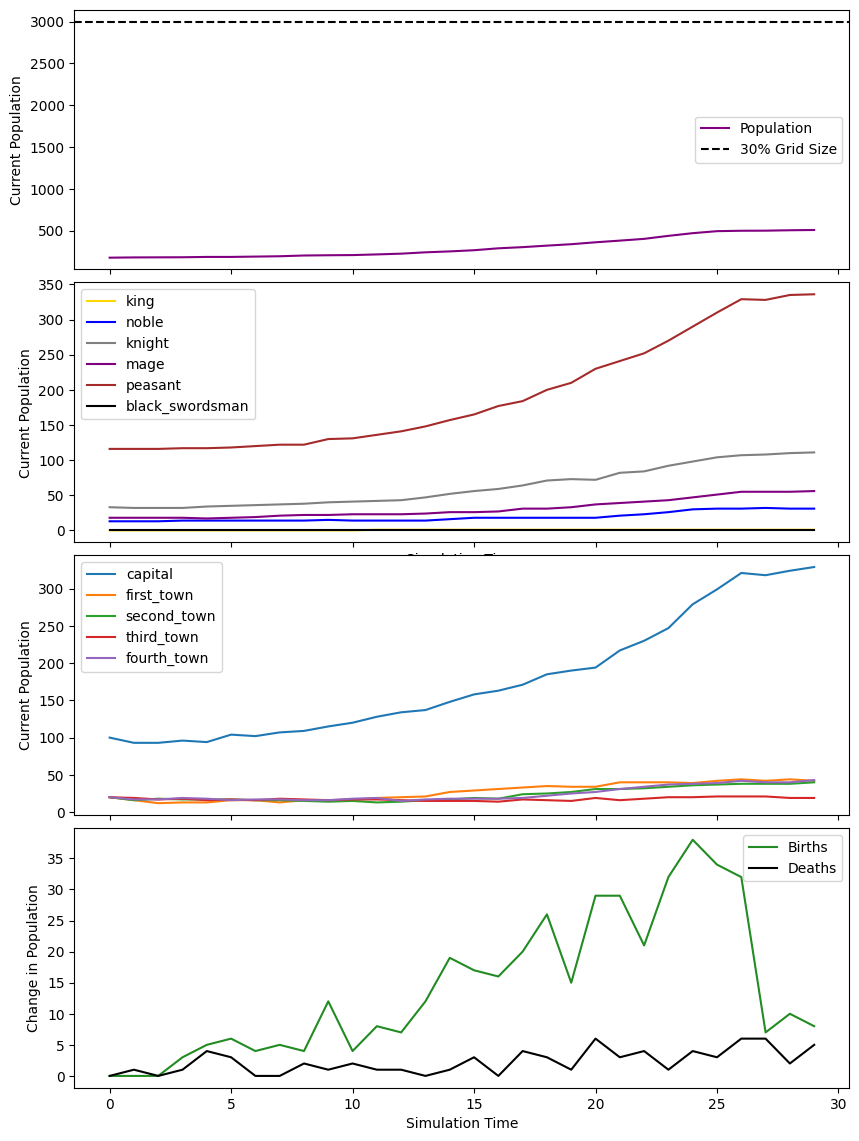

In [5]:
fig, ax = plt.subplots(4, 1, figsize = (10,14), sharex=True)

grid_area = grid[0]*grid[1]

ax[0].plot(np.arange(TestCiv.run_t),TestCiv.pop_alive, c = "purple", label = "Population")
ax[0].set_ylabel("Current Population")
ax[0].axhline(grid_area*max_world_pop, ls = "--", color = "black", label = "{val}% Grid Size".format(val = int(max_world_pop*100)))
ax[0].legend()

for i in range(len(list(TestCiv.world_max_class_dict.keys()))):
    key = list(TestCiv.world_max_class_dict.keys())[i]
    ax[1].plot(np.arange(TestCiv.run_t), np.array(TestCiv.historical_class_count)[:,i], c = probability_color_dict[key][1], label = key)
ax[1].set_ylabel("Current Population")
ax[1].set_xlabel("Simulation Time")
ax[1].legend()

for city in TestCiv.cities:
    ax[2].plot(np.arange(TestCiv.run_t), np.array(city.historical_pop), label = city.name)
ax[2].set_ylabel("Current Population")
ax[2].legend()

ax[3].plot(np.arange(TestCiv.run_t), TestCiv.num_births, c = "forestgreen", label = "Births")
ax[3].plot(np.arange(TestCiv.run_t), TestCiv.num_deaths, c = "black", label = "Deaths")
ax[3].set_ylabel("Change in Population")
ax[3].set_xlabel("Simulation Time")
ax[3].legend()

plt.subplots_adjust(hspace = 0.05)

plt.savefig("Population_Plot.png")

# Roadmap

## Main Goals
- Decrease the amount of for loops used throughout code
- Standardize list/arrays into arrays only to avoid needing to convert lists to arrays
- Have a consistent population that does not die out quickly or explode into blocking regions of the world - WIP (may change with future changes to code)

## Issues
- Find a better way other than a for loop to check if a pop is inside a city and how to determine what city that is (try creating grid of 1 and 0 for city locs and pop loc and multiplying together)
- Colorbar labeling makes no sense, trying to keep consistent vmin and vmax starting at 0 ruins colormap, values are only assigned to 2 or 3 values, current code is working but has steps that seem unessesary
- Including extra conditions on where pops can spawn as well as randomly choosing the initial world spawn location on a pop-by-pop basis rather than all at once has dramatically slowed down the simulation. Look in Civ_Class add_person() method and remove some redundancy with the condition check. Issue stems from randomly indexing causing reduction of array from x,y to just x or y value when initial array only had one x,y pair.

## Future Work
- create caste society - WIP
- create types of people (protector for king, assasin, etc) - WIP
- add stats system - WIP
    - break down large classes into subcategories (peasants into laborers, farmers, etc.)
- make child very likely to be class of parent
    - will need to change how initial classes are chosen to keep balance
- include paths between towns that are safe
- create subclasses of Person class that corresponds to different classes to allow for unique behavior without needing to check class

# Completed Tasks

## Resolved Issues
- Random error that says "-11 index out of range for axis 0 with size 10" - RESOLVED
- If all pops die several are still drawn on the board - RESOLVED
- Balance issue with number of kills/births and deaths, deaths win over population quickly even at high lifespans - RESOLVED
- Issue with maximum population spiking during each step - RESOLVED
- Issue when pop dies, they appear near bottom right of grid (maybe 95 95 from -5 -5 death position) for single frame - RESOLVED
- Balance issue with pops spawning in close clusters near border of world while dying out in all cities - RESOLVED
- Even when 100% guranteed to die outside of city, some pops still survive (most likely due to self.in_city flag being stuck on True when it should be checking before and after the movement) - RESOLVED
- Spike near beginning of world creation may be artificial - RESOLVED
- Pops dying in city may not be subtracting from total population to cause population limit to be incorrectly reached - RESOLVED
- class probabilities for unique classes have probabilities increased too much when considering missing class probabilities (black swordsman becomes probable class to spawn) - RESOLVED
- when king moves to capital center, he moves towards correct center, then once he reaches it he moves up towards to the top left corner of the capital before moving randomly - RESOLVED
- Updating pop location selection messed up array element selection - RESOLVED

## Completed Work
- keep track of total deaths and births over time - DONE
- color pops based on average like value - CLASS COLORING INSTEAD
- create pop cap below grid size to allow more movement - DONE
- make cities/regions that pops tend to stay in/near - DONE